In [ ]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
#X_train = np.array([[2, -1], [-3, -1], [1, 8], [4, 1]])
X_train = np.array([[200, -1], [-3, -100], [1000, 8], [4, 1]])
y_train = np.array([5, 2, 7, 4])
X_test = np.array([[3, -3]])
y_test = np.array([4])

In [ ]:
%%script false

ss = StandardScaler(with_std=False)
#ss = StandardScaler(with_std=False)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
y_mean = y_train.mean()
y_train = y_train - y_mean
y_test = y_test -y_mean

In [ ]:
X_train

array([[ 200,   -1],
       [  -3, -100],
       [1000,    8],
       [   4,    1]])

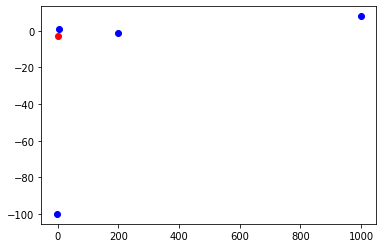

In [ ]:
plt.scatter(*zip(*X_train), c="b")
plt.scatter(*zip(*X_test), c="r")

Without PLS

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
mean_absolute_error(y_train, reg.predict(X_train)), mean_absolute_error(y_test, reg.predict(X_test))

(0.1457776246339222, 0.1347052819767418)

In [ ]:
reg.intercept_, reg.coef_

(4.191850911368611, array([0.00269167, 0.02174021]))

PLS with 2 components

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
mean_absolute_error(y_train, pls.predict(X_train)), mean_absolute_error(y_test, pls.predict(X_test))

(0.1457776246339223, 0.1347052819767418)

In [ ]:
pls.coef_

array([[1.28094921],
       [1.11914598]])

In [ ]:
pls.predict(X_test)

array([[4.13470528]])

In [ ]:
X_test @ pls.coef_ + y_mean

array([[4.98540969]])

In [ ]:
pls.transform(X_test) @ pls.coef_ + y_mean

array([[5.06512634]])

In [ ]:
pls.coef_ @ pls.transform(X_test) 

array([[-0.23517962,  0.91601213],
       [-0.20547288,  0.80030596]])

In [ ]:
Z_train = pls.transform(X_train)
np.std(Z_train, axis=0), Z_train

(array([1.0555534 , 0.62092511]), array([[ 0.1426811 ,  0.45242279],
        [-1.49370237, -0.61930198],
        [ 1.4794503 , -0.60214275],
        [-0.12842903,  0.76902194]]))

In [ ]:
Z_train.T @ Z_train

array([[ 4.45677188e+00, -1.29682796e-15],
       [-1.29682796e-15,  1.54219195e+00]])

In [ ]:
Z_train.mean(axis=0)

array([-4.85722573e-17,  2.77555756e-17])

With 1 component

In [ ]:
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
mean_absolute_error(y_train, pls.predict(X_train)), mean_absolute_error(y_test, pls.predict(X_test))

(0.147144089748112, 0.18821619266549305)

In [ ]:
pls.coef_
# coef_ndarray of shape (n_features, n_targets)
# The coefficients of the linear model such that Y is approximated as Y = X @ coef_.

array([[1.22845886],
       [1.17248943]])

-------------------

In [ ]:
pls.algorithm

'nipals'

In [ ]:
pls.deflation_mode

'regression'

In [ ]:
pls.mode

'A'

In [ ]:
pls.n_iter_

[1]

In [ ]:
pls.norm_y_weights

False

In [ ]:
pls.x_loadings_
# x_loadings_ndarray of shape (n_features, n_components)
# The loadings of X.

array([[0.71286632],
       [0.70146569]])

In [ ]:
pls.x_mean_

array([300.25, -23.  ])

In [ ]:
pls.x_rotations_
# x_rotations_ndarray of shape (n_features, n_components)
# The projection matrix used to transform X.

array([[0.72339389],
       [0.69043557]])

In [ ]:
pls.x_scores_

array([[ 0.1426811 ],
       [-1.49370237],
       [ 1.4794503 ],
       [-0.12842903]])

In [ ]:
pls.x_std_

array([475.89380818,  51.4781507 ])

In [ ]:
pls.x_weights_
# x_weights_ndarray of shape (n_features, n_components)
# The left singular vectors of the cross-covariance matrices of each iteration.

array([[0.72339389],
       [0.69043557]])

In [ ]:
pls.y_loadings_

array([[0.81578315]])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)